In [1]:
import torch
from sklearn import datasets
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchncmml.utils import get_class_mean
from torchncmml.ncmml import LinearTransform, NCMMLLoss
from torch.optim import SGD
from sklearn.model_selection import train_test_split


In [2]:
iris = datasets.load_iris()
X, y = torch.tensor(iris['data'], dtype=torch.float), torch.tensor(iris['target'], dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10)
mean = get_class_mean(train_dataloader)

for idx, c_m in enumerate(mean):
    print(f'Class {idx}, feature mean : \n{c_m}')

Class 0, feature mean : 
tensor([5.0000, 3.4647, 1.4882, 0.2471])
Class 1, feature mean : 
tensor([6.0242, 2.7303, 4.2606, 1.3152])
Class 2, feature mean : 
tensor([6.6515, 3.0152, 5.6121, 2.0636])


In [3]:
transform = LinearTransform(in_features=4, out_features=2, init_method='identity')
criterion = NCMMLLoss()
optimizer = SGD(transform.parameters(), lr=0.1)

for epoch in range(200):
    for batch in train_dataloader:
        features, targets = batch

        features = transform(features)
        features_mean = transform(mean)

        optimizer.zero_grad()
        loss = criterion(features, features_mean, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch} Loss: {loss.detach().item():.3f}')

Epoch: 0 Loss: 0.404
Epoch: 1 Loss: 0.281
Epoch: 2 Loss: 0.211
Epoch: 3 Loss: 0.310
Epoch: 4 Loss: 0.249
Epoch: 5 Loss: 0.205
Epoch: 6 Loss: 0.184
Epoch: 7 Loss: 0.206
Epoch: 8 Loss: 0.246
Epoch: 9 Loss: 0.191
Epoch: 10 Loss: 0.221
Epoch: 11 Loss: 0.111
Epoch: 12 Loss: 0.159
Epoch: 13 Loss: 0.147
Epoch: 14 Loss: 0.105
Epoch: 15 Loss: 0.090
Epoch: 16 Loss: 0.106
Epoch: 17 Loss: 0.059
Epoch: 18 Loss: 0.115
Epoch: 19 Loss: 0.051
Epoch: 20 Loss: 0.159
Epoch: 21 Loss: 0.131
Epoch: 22 Loss: 0.167
Epoch: 23 Loss: 0.137
Epoch: 24 Loss: 0.101
Epoch: 25 Loss: 0.136
Epoch: 26 Loss: 0.126
Epoch: 27 Loss: 0.151
Epoch: 28 Loss: 0.040
Epoch: 29 Loss: 0.065
Epoch: 30 Loss: 0.185
Epoch: 31 Loss: 0.108
Epoch: 32 Loss: 0.131
Epoch: 33 Loss: 0.160
Epoch: 34 Loss: 0.153
Epoch: 35 Loss: 0.083
Epoch: 36 Loss: 0.085
Epoch: 37 Loss: 0.084
Epoch: 38 Loss: 0.067
Epoch: 39 Loss: 0.127
Epoch: 40 Loss: 0.111
Epoch: 41 Loss: 0.049
Epoch: 42 Loss: 0.060
Epoch: 43 Loss: 0.069
Epoch: 44 Loss: 0.063
Epoch: 45 Loss: 0.08

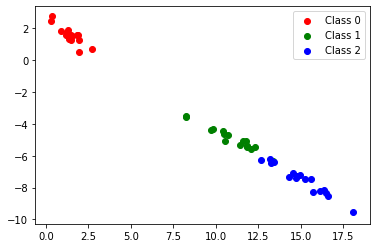

In [4]:
import matplotlib.pyplot as plt

features, targets = zip(*[batch for batch in test_dataloader])
features = torch.cat(features)
targets = torch.cat(targets)

labeled_features = [features[targets == t] for t in targets.unique()]
colors = ['r', 'g', 'b']

transform.eval()
for idx, l_features in enumerate(labeled_features):
    X = transform(l_features).detach().numpy()
    plt.scatter(X[:, 0], X[:, 1], color=colors[idx], label=f'Class {idx}')
plt.legend()
plt.show()
